## SavorStay - Customer Segmentation Analysis

#### **Goal**: How can SavorStay grow their business with their most loyal users? What would work best for this new segment?

#### **Getting Started**

In [3]:
# Import all necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [4]:
# Import dataset
file_path = 'LAUNCH Superday Case Study_SavorStay.xlsm'
Customers = pd.read_excel(file_path)

In [5]:
# Preview DF
print(Customers.head())

   Customer ID  Exact Spend  #MealKits Income Range Age Range  \
0        91844     358130.0         36        >150K       >65   
1        72134     296876.0         27        >150K     35-50   
2          787     292246.0         60        >150K     50-65   
3        55159     292229.0         22        >150K     35-50   
4        11428     286901.0         28        >150K       <35   

  Product Spend Range Loyalty Product Type  
0               100k+                 HIGH  
1               100k+               MEDIUM  
2               100k+                  LOW  
3               100k+               MEDIUM  
4               100k+               MEDIUM  


In [9]:
# Check each column data type
Customers.dtypes

Customer ID               int64
Exact Spend             float64
#MealKits                 int64
Income Range             object
Age Range                object
Product Spend Range      object
Loyalty Product Type     object
dtype: object

In [47]:
# Understand file size and data within the columns
Customers.describe()

### Reminder that the other columns are all categorical

,Customer ID,Exact Spend,#MealKits
count,98757.000000,98757.000000,98757.000000
mean,50004.228703,7928.379278,6.093158
std,28865.097960,16528.230196,14.866633
min,1.000000,0.000000,0.000000
25%,25013.000000,0.000000,0.000000
50%,49999.000000,1048.000000,1.000000
75%,74999.000000,7858.000000,6.000000
max,100000.000000,358130.000000,792.000000


In [43]:
# Check number of unique values
Customers.nunique()

Customer ID             98757
Exact Spend             25769
#MealKits                 234
Income Range                5
Age Range                   4
Product Spend Range         6
Loyalty Product Type        3
dtype: int64

In [45]:
# Check number of null values
Customers.isnull().sum()

### Note that there are no null values within the dataset

Customer ID             0
Exact Spend             0
#MealKits               0
Income Range            0
Age Range               0
Product Spend Range     0
Loyalty Product Type    0
dtype: int64

#### **Cleaning Data**

In [13]:
### Note that the other columns are all categorical - determine if we want to leave them that way

# To check if we want to leave other columns as categorical variables let's check our variable possibilities
# Check possibilities for Income Range, Age Range, Product Spend Range, Loyalty Product Type
print("Income Range possibilities:", Customers['Income Range'].unique())
print("Age Range possibilities:", Customers['Age Range'].unique())
print("Product Spend Range possibilities:", Customers['Product Spend Range'].unique())
print("Loyalty Product Type possibilities:", Customers['Loyalty Product Type'].unique())

Income Range possibilities: [' >150K' ' 110-150K' ' 75-110K' ' 50-75K' ' <50k']
Age Range possibilities: [' >65' ' 35-50' ' 50-65' '<35']
Product Spend Range possibilities: [' 100k+' ' 30-100K' ' 15-30k' ' 5-15k' ' 1-5k' '<1k']
Loyalty Product Type possibilities: ['HIGH' 'MEDIUM' 'LOW']


Based on our understanding of the data above, I have choosen to leave Income Range, Age Range, Product Spend Range, and Loyalty Product Type as categorical variables. These were predetermined categories within the dataset, which likely means they are categories used regularly inside the company. If I was to take this one step further I would like to make these categorical variables into continuous variables to see if there are noticeable trends outside of the predetermined groups.

#### **EDA**

Income Range           110-150K   50-75K   75-110K   <50k   >150K
Loyalty Product Type                                             
HIGH                       1040     1194      1350    717    2528
LOW                        8499    17057     14337  12679   18065
MEDIUM                     2955     4428      4412   2482    7014


Income Range           110-150K     50-75K    75-110K       <50k      >150K
Loyalty Product Type                                                       
HIGH                  15.229170  17.484258  19.768634  10.499341  37.018597
LOW                   12.031938  24.147402  20.296728  17.949517  25.574416
MEDIUM                13.879104  20.797520  20.722371  11.657508  32.943497


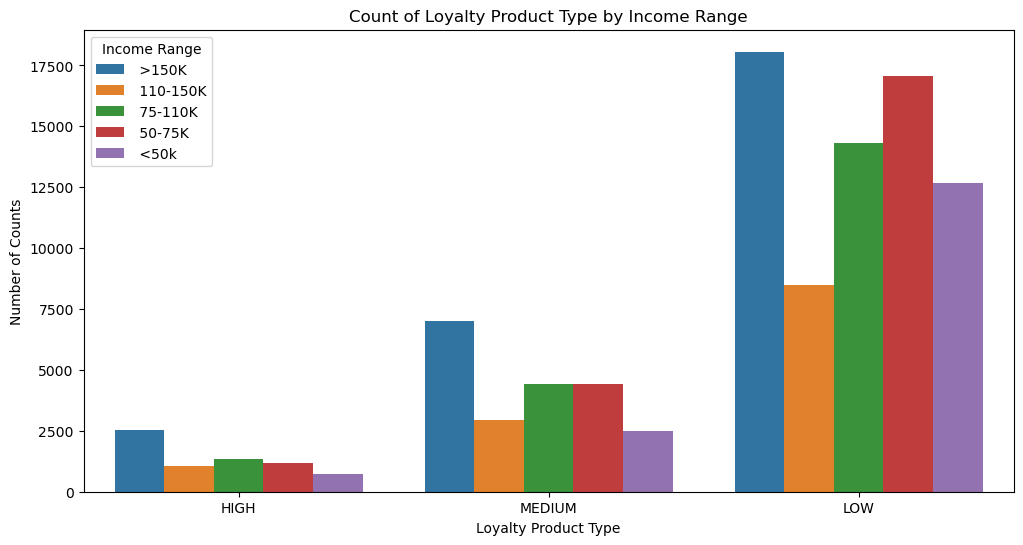

In [32]:
# Make this a stacked bar graph (and do it for other two categorical variables - Age Range & Product Spend Range)
approval_table = pd.crosstab(Customers['Loyalty Product Type'], Customers['Income Range'])
print(approval_table)

print("\n")

# Convert counts to percentages within each row
approval_percentage_row = approval_table.div(approval_table.sum(axis=1), axis=0) * 100
print(approval_percentage_row)


plt.figure(figsize=(12, 6))
sns.countplot(x='Loyalty Product Type', hue='Income Range', data = Customers)
plt.title("Count of Loyalty Product Type by Income Range")
plt.xlabel("Loyalty Product Type")
plt.ylabel("Number of Counts")
plt.legend(title = "Income Range")
plt.show()

# Notes: For each count of loyalty product type (low, medium, and high), income range of >150k had the highest count and income range between 110-150k had the lowest count. Obviously these counts were different with the High loyalty product type having a highest count of 2528, medium of 7014, and low of 18065.

Age Range              35-50   50-65    >65   <35
Loyalty Product Type                             
HIGH                    2093    2124   1034  1578
LOW                    16863   27007  18396  8371
MEDIUM                  6098    8039   4152  3002


Age Range                 35-50      50-65        >65        <35
Loyalty Product Type                                            
HIGH                  30.648704  31.102650  15.141309  23.107336
LOW                   23.872758  38.233504  26.043009  11.850730
MEDIUM                28.641210  37.757738  19.501198  14.099854


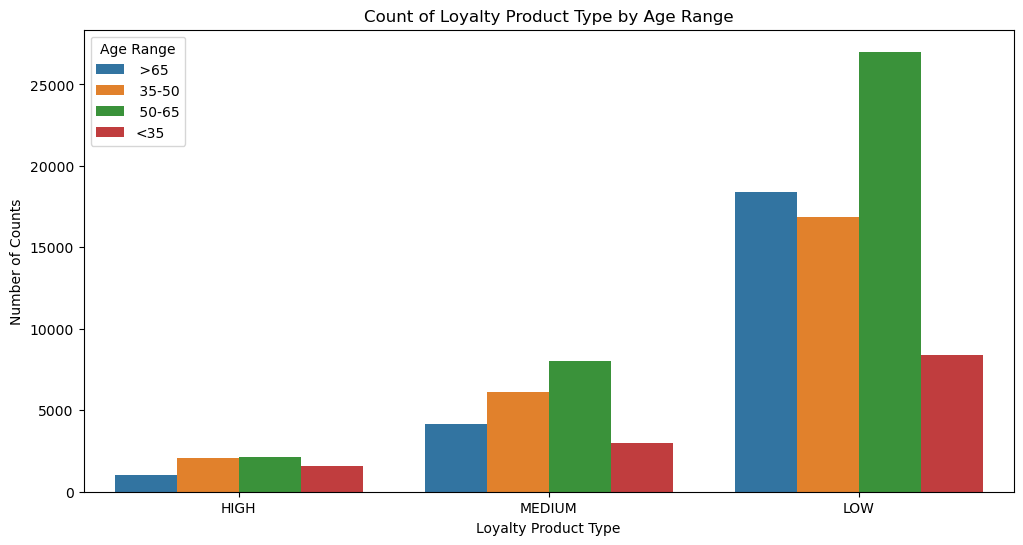

In [34]:
# Age Range
approval_table2 = pd.crosstab(Customers['Loyalty Product Type'], Customers['Age Range'])
print(approval_table2)

print("\n")

# Convert counts to percentages within each row
approval_percentage_row2 = approval_table2.div(approval_table2.sum(axis=1), axis=0) * 100
print(approval_percentage_row2)


plt.figure(figsize=(12, 6))
sns.countplot(x='Loyalty Product Type', hue='Age Range', data = Customers)
plt.title("Count of Loyalty Product Type by Age Range")
plt.xlabel("Loyalty Product Type")
plt.ylabel("Number of Counts")
plt.legend(title = "Age Range")
plt.show()

# Notes: In Count of Loyalty Product Type by Age Range, ages 50-65 were the highest counts for each group and ages >65 was the lowest for high loyalty product type and ages <35 were the lowest for medium and low loyalty product type

Age Range              35-50   50-65    >65   <35
Loyalty Product Type                             
HIGH                    2093    2124   1034  1578
LOW                    16863   27007  18396  8371
MEDIUM                  6098    8039   4152  3002


Product Spend Range        1-5k     100k+     15-30k    30-100K      5-15k  \
Loyalty Product Type                                                         
HIGH                  22.111583  1.449700  13.457314  13.310880  21.906575   
LOW                   19.001373  0.168467   6.687713   4.608067  12.896924   
MEDIUM                20.022545  1.047391  13.446996  14.668170  18.059274   

Product Spend Range         <1k  
Loyalty Product Type             
HIGH                  27.763948  
LOW                   56.637456  
MEDIUM                32.755624  


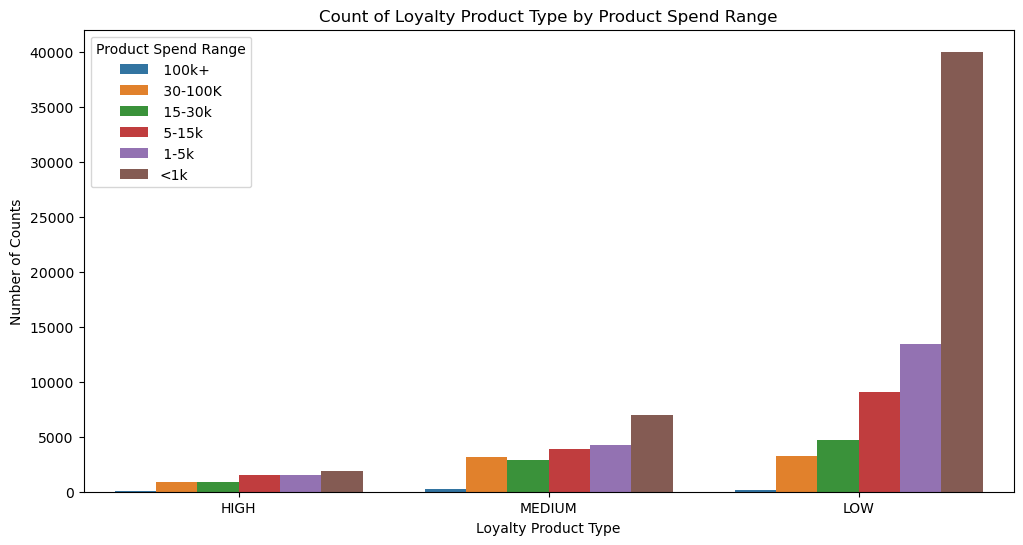

In [40]:
# Product Spend
approval_table3 = pd.crosstab(Customers['Loyalty Product Type'], Customers['Product Spend Range'])
print(approval_table2)

print("\n")

# Convert counts to percentages within each row
approval_percentage_row3 = approval_table3.div(approval_table3.sum(axis=1), axis=0) * 100
print(approval_percentage_row3)


plt.figure(figsize=(12, 6))
sns.countplot(x='Loyalty Product Type', hue='Product Spend Range', data = Customers)
plt.title("Count of Loyalty Product Type by Product Spend Range")
plt.xlabel("Loyalty Product Type")
plt.ylabel("Number of Counts")
plt.legend(title = "Product Spend Range")
plt.show()

# Notes: For Loyalty Product Type by Product Spend Range, the count of each group decreases as product spend range increases 

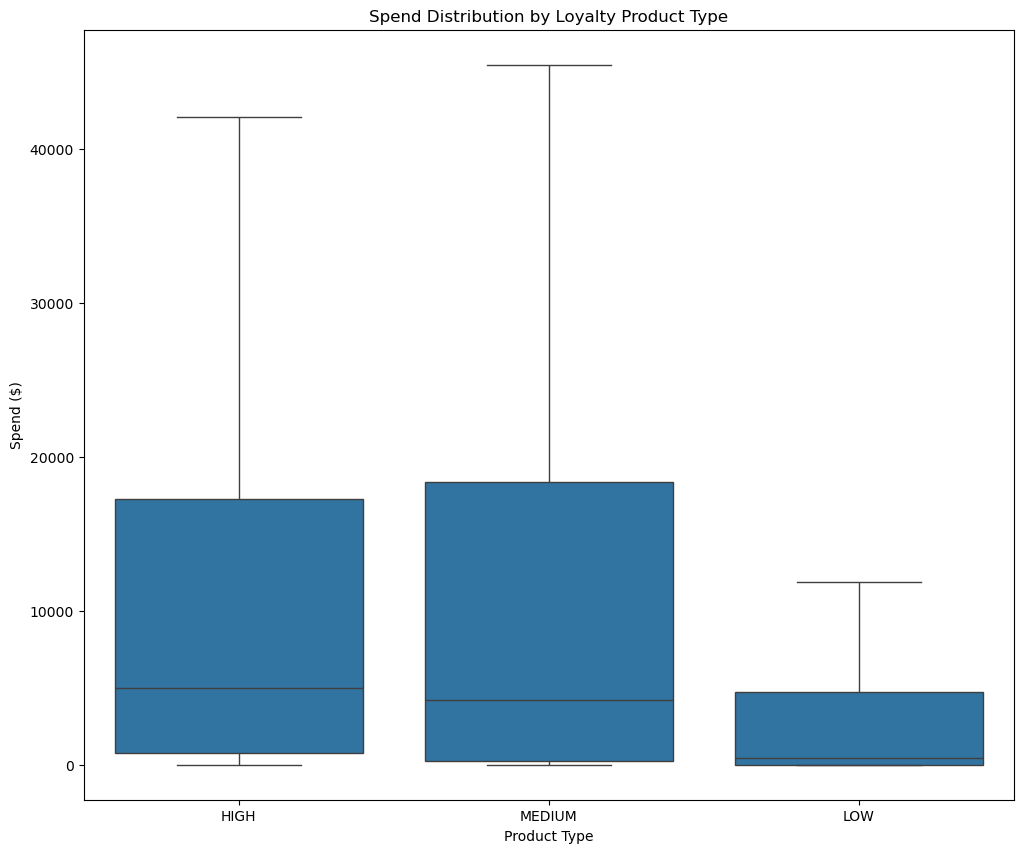

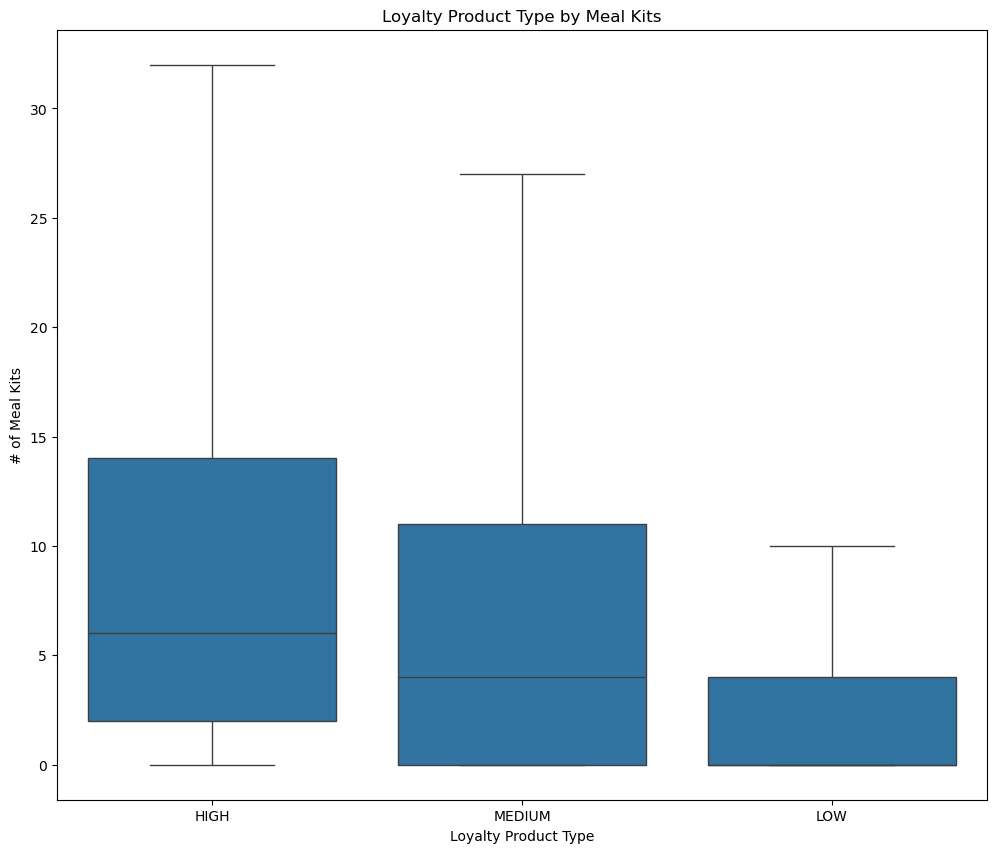

In [54]:
# Make a boxplot for Loyalty Product Type and Exact Spend & Meal Kits (is there a better visualization for these to use) #MealKits  
plt.figure(figsize=(12, 10))
sns.boxplot(x='Loyalty Product Type', y='Exact Spend', data = Customers, showfliers=False)
plt.title("Spend Distribution by Loyalty Product Type")
plt.xlabel("Product Type")
plt.ylabel("Spend ($)")
plt.show()

print('\n')

# Boxplot for Meal Kits
plt.figure(figsize=(12, 10))
sns.boxplot(x='Loyalty Product Type', y='#MealKits', data = Customers, showfliers=False)
plt.title("Loyalty Product Type by Meal Kits")
plt.xlabel("Loyalty Product Type")
plt.ylabel("# of Meal Kits")
plt.show()

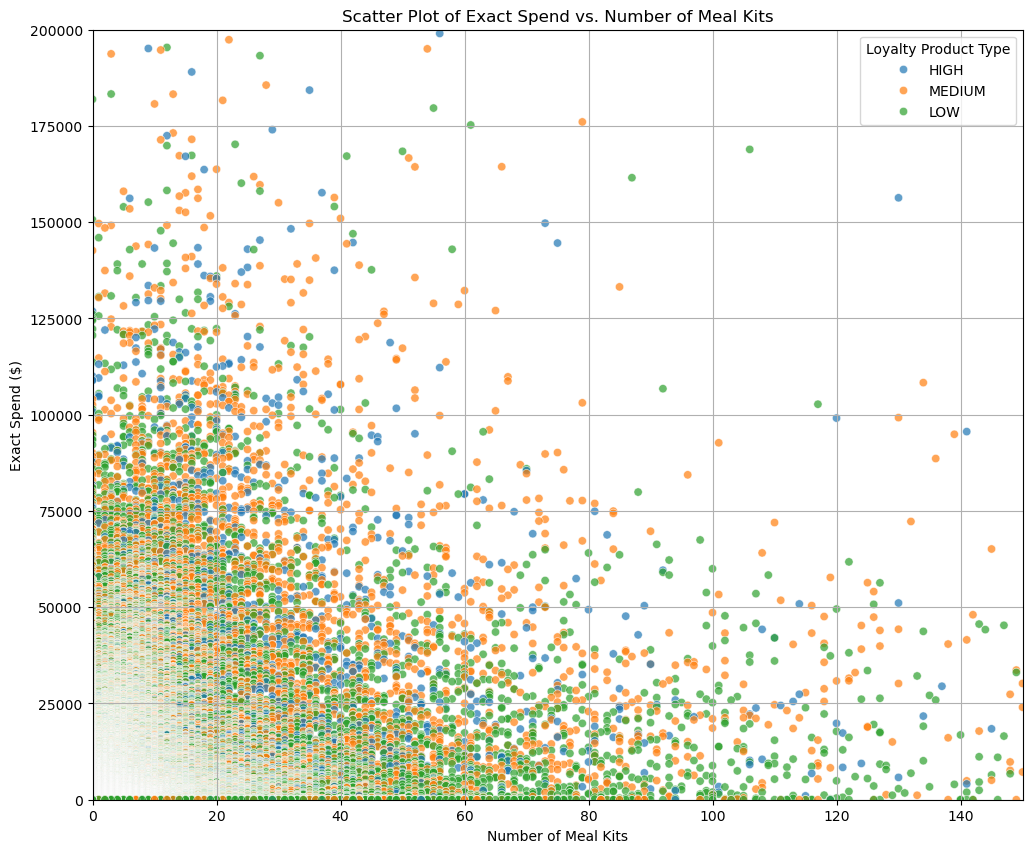

In [66]:
# Make a scatter plot for Exact Spend and #MealKits
# Color it by Loyalty Product Type
plt.figure(figsize=(12, 10))
sns.scatterplot(x='#MealKits', y='Exact Spend', data = Customers, hue = 'Loyalty Product Type', alpha=0.7)

# Zoomed in on the graph to see if there was any pattern in the cluster found in the bottom left
plt.xlim(0, 150)
plt.ylim(0, 200000)

# Label the graph
plt.title("Scatter Plot of Exact Spend vs. Number of Meal Kits")
plt.xlabel("Number of Meal Kits")
plt.ylabel("Exact Spend ($)")
plt.grid(True)
plt.show()

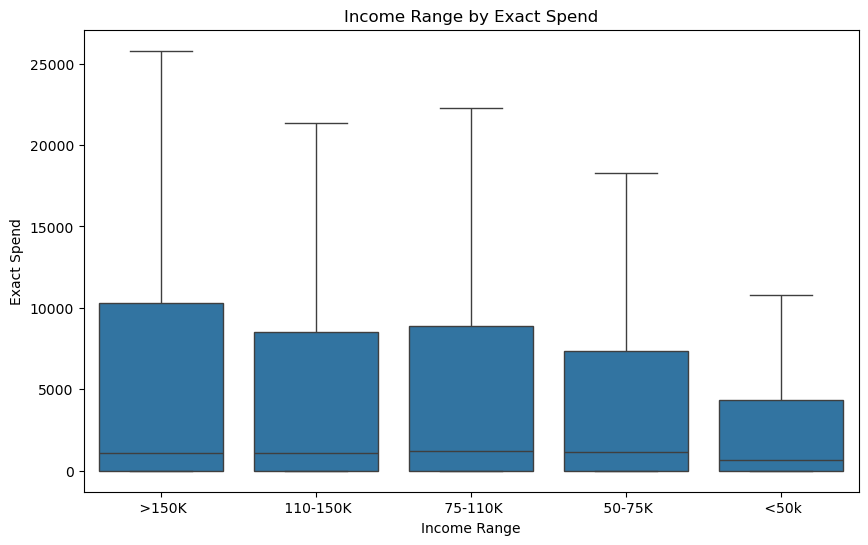

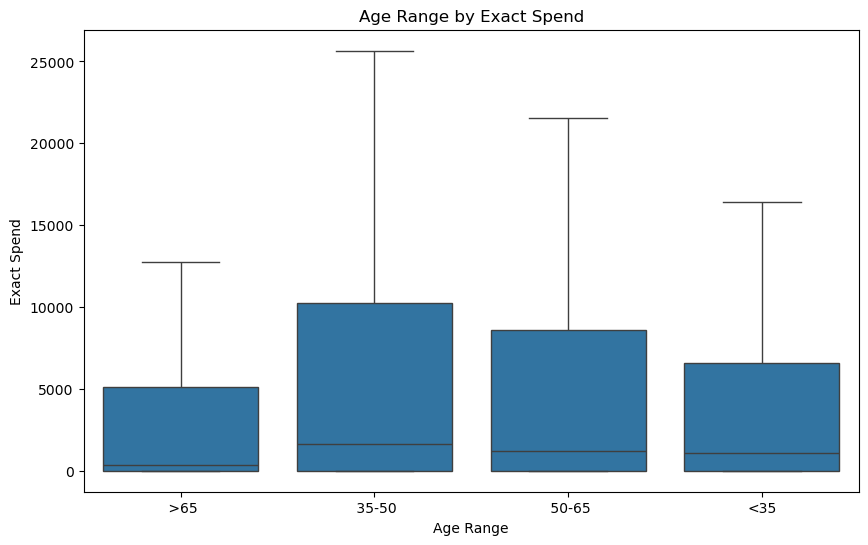

In [78]:
# Put Exact Spend against Income Range & Age Range
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Range', y='Exact Spend', data = Customers, showfliers=False)
plt.title("Income Range by Exact Spend")
plt.xlabel("Income Range")
plt.ylabel("Exact Spend")
plt.show()

print('\n')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Range', y='Exact Spend', data = Customers, showfliers=False)
plt.title("Age Range by Exact Spend")
plt.xlabel("Age Range")
plt.ylabel("Exact Spend")
plt.show()

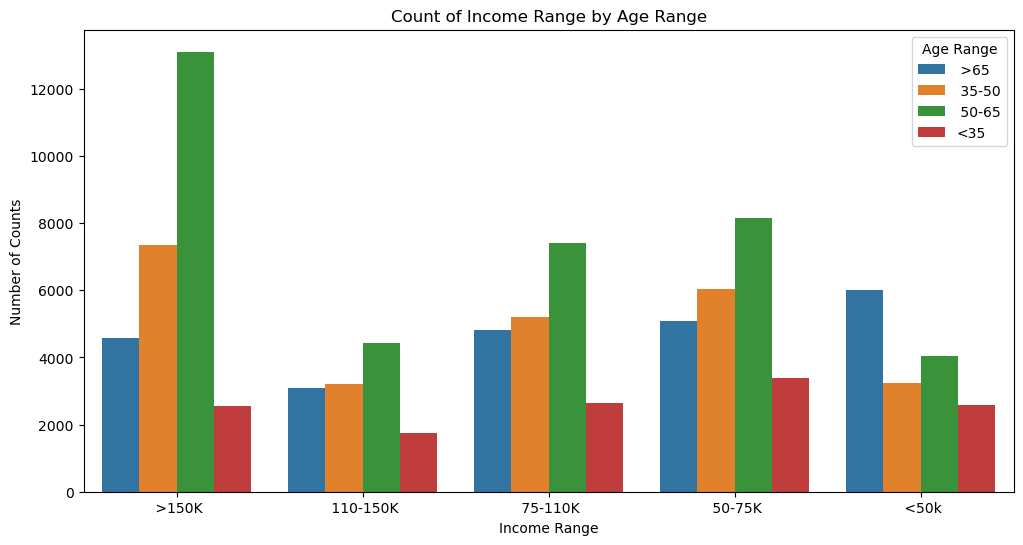

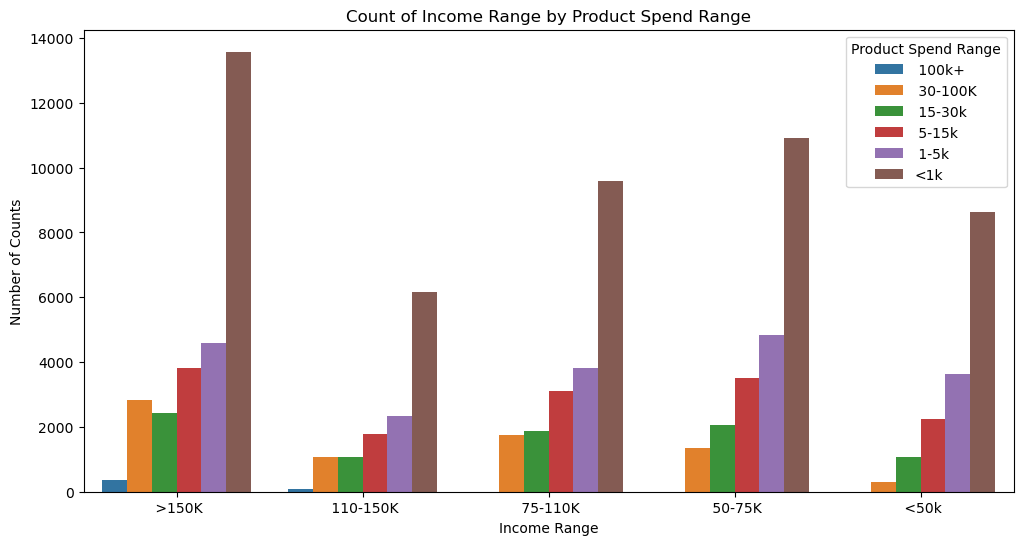

In [82]:
# Check Income Range against Age Range and Product Spend Range to see if it has the trend we would expect
plt.figure(figsize=(12, 6))
sns.countplot(x='Income Range', hue='Age Range', data = Customers)
plt.title("Count of Income Range by Age Range")
plt.xlabel("Income Range")
plt.ylabel("Number of Counts")
plt.legend(title = "Age Range")
plt.show()

print('\n')

plt.figure(figsize=(12, 6))
sns.countplot(x='Income Range', hue='Product Spend Range', data = Customers)
plt.title("Count of Income Range by Product Spend Range")
plt.xlabel("Income Range")
plt.ylabel("Number of Counts")
plt.legend(title = "Product Spend Range")
plt.show()

##### 1) What does data tell us about these loyalty product owners?